In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [573]:
df = pd.read_csv('data/dataset.csv')
df["Salary"] = df["Salary"].replace(" ", np.nan)
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [574]:
X

array([[32.0, 'Male', "Bachelor's", 'Software Engineer', 5.0],
       [28.0, 'Female', "Master's", 'Data Analyst', 3.0],
       [45.0, 'Male', 'PhD', 'Senior Manager', 15.0],
       ...,
       [29.0, 'Female', "Bachelor's", 'Junior Project Manager', 2.0],
       [34.0, 'Male', "Bachelor's", 'Senior Operations Coordinator', 7.0],
       [44.0, 'Female', 'PhD', 'Senior Business Analyst', 15.0]],
      shape=(375, 5), dtype=object)

In [575]:
y

array([ 90000.       ,  65000.       , 150000.       ,  60000.       ,
       200000.       ,  55000.       , 120000.       ,  80000.       ,
        45000.       , 110000.       ,  75000.       , 140000.       ,
        65000.       , 130000.       ,  40000.       , 125000.       ,
        90000.       , 115000.       ,  35000.       , 180000.       ,
        80000.       , 190000.       ,  50000.       ,  60000.       ,
       140000.       ,  45000.       , 110000.       ,  40000.       ,
       140000.       ,  90000.       , 250000.       ,  55000.       ,
        75000.       ,  65000.       , 170000.       ,  45000.       ,
        60000.       , 115000.       ,  40000.       , 160000.       ,
        80000.       , 190000.       ,  60000.       ,  45000.       ,
       130000.       ,  40000.       ,  75000.       , 180000.       ,
       120000.       ,  35000.       , 130000.       ,  85000.       ,
        60000.       , 200000.       ,  50000.       ,  95000.       ,
      

In [576]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X

array([[32.0, 1, "Bachelor's", 'Software Engineer', 5.0],
       [28.0, 0, "Master's", 'Data Analyst', 3.0],
       [45.0, 1, 'PhD', 'Senior Manager', 15.0],
       ...,
       [29.0, 0, "Bachelor's", 'Junior Project Manager', 2.0],
       [34.0, 1, "Bachelor's", 'Senior Operations Coordinator', 7.0],
       [44.0, 0, 'PhD', 'Senior Business Analyst', 15.0]],
      shape=(375, 5), dtype=object)

In [577]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [2, 3])], remainder="passthrough")
X = ct.fit_transform(X)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1693 stored elements and shape (375, 182)>
  Coords	Values
  (0, 0)	1.0
  (0, 163)	1.0
  (0, 179)	32.0
  (0, 180)	1.0
  (0, 181)	5.0
  (1, 1)	1.0
  (1, 21)	1.0
  (1, 179)	28.0
  (1, 181)	3.0
  (2, 2)	1.0
  (2, 134)	1.0
  (2, 179)	45.0
  (2, 180)	1.0
  (2, 181)	15.0
  (3, 0)	1.0
  (3, 105)	1.0
  (3, 179)	36.0
  (3, 181)	7.0
  (4, 1)	1.0
  (4, 26)	1.0
  (4, 179)	52.0
  (4, 180)	1.0
  (4, 181)	20.0
  (5, 0)	1.0
  (5, 85)	1.0
  :	:
  (369, 179)	33.0
  (369, 180)	1.0
  (369, 181)	4.0
  (370, 0)	1.0
  (370, 135)	1.0
  (370, 179)	35.0
  (370, 181)	8.0
  (371, 1)	1.0
  (371, 34)	1.0
  (371, 179)	43.0
  (371, 180)	1.0
  (371, 181)	19.0
  (372, 0)	1.0
  (372, 74)	1.0
  (372, 179)	29.0
  (372, 181)	2.0
  (373, 0)	1.0
  (373, 141)	1.0
  (373, 179)	34.0
  (373, 180)	1.0
  (373, 181)	7.0
  (374, 2)	1.0
  (374, 114)	1.0
  (374, 179)	44.0
  (374, 181)	15.0


In [578]:
X_dense = X.toarray()  # Convert sparse to dense
print(X_dense)

[[ 1.  0.  0. ... 32.  1.  5.]
 [ 0.  1.  0. ... 28.  0.  3.]
 [ 0.  0.  1. ... 45.  1. 15.]
 ...
 [ 1.  0.  0. ... 29.  0.  2.]
 [ 1.  0.  0. ... 34.  1.  7.]
 [ 0.  0.  1. ... 44.  0. 15.]]


In [579]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=0)

In [580]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [581]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [582]:
X_train

array([[-1.25064086,  1.82970656, -0.42556123, ...,  1.33822894,
         0.91132238,  1.35050031],
       [ 0.79959006, -0.54653573, -0.42556123, ..., -1.20905993,
        -1.04151129, -1.3117031 ],
       [ 0.79959006, -0.54653573, -0.42556123, ..., -0.78451179,
        -1.04151129, -0.93138833],
       ...,
       [-1.25064086, -0.54653573,  2.34983811, ...,  1.47974499,
         0.91132238,  1.50262622],
       [-1.25064086,  1.82970656, -0.42556123, ...,  1.05519685,
        -1.04151129,  0.89412258],
       [-1.25064086, -0.54653573, -0.42556123, ...,  0.        ,
         2.86415604,  0.        ]], shape=(300, 182))

In [583]:
from sklearn.preprocessing import MinMaxScaler

sc_y = MinMaxScaler()
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

In [584]:
y_train_scaled

array([[0.67955137],
       [0.13879431],
       [0.23893451],
       [0.3390747 ],
       [0.71960745],
       [0.13879431],
       [0.4392149 ],
       [0.31904667],
       [0.15882235],
       [0.19887843],
       [0.75966353],
       [0.75966353],
       [0.17885039],
       [0.13879431],
       [0.13879431],
       [0.71960745],
       [0.23893451],
       [0.47927098],
       [0.47927098],
       [0.23893451],
       [0.4392149 ],
       [0.55938314],
       [0.19887843],
       [0.39915882],
       [0.17885039],
       [0.59943921],
       [0.19887843],
       [0.39915882],
       [0.47927098],
       [0.15882235],
       [0.25896255],
       [0.37913078],
       [0.3390747 ],
       [0.25896255],
       [0.59943921],
       [0.39915882],
       [0.45924294],
       [0.47927098],
       [0.4392149 ],
       [0.35910274],
       [0.15882235],
       [0.15882235],
       [0.13879431],
       [0.3390747 ],
       [0.19887843],
       [0.73963549],
       [0.67955137],
       [0.399

In [585]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [586]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [587]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [588]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [589]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [590]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [591]:
ann.fit(X_train, y_train_scaled, batch_size=5, epochs=200)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 0.1766 - mae: 0.3051 
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.0521 - mae: 0.1634
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.0245 - mae: 0.1046
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.0141 - mae: 0.0782  
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0089 - mae: 0.0589
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.0069 - mae: 0.0512
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.0056 - mae: 0.0449
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.0053 - mae: 0.0434
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0048 - mae: 0.0401  
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0046 - mae: 0.0362  
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.0048 - mae: 0.0379
Epoch 12/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0047 - mae: 0.0378
Epoch 

In [592]:
y_pred_scaled = ann.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[[ 67707.6640625   50000.        ]
 [109500.421875   130000.        ]
 [148607.         150000.        ]
 [114165.796875   110000.        ]
 [ 65206.9296875   90000.        ]
 [143627.0625     150000.        ]
 [167365.28125    170000.        ]
 [ 92612.3359375   90000.        ]
 [131327.203125   160000.        ]
 [ 65032.8984375   60000.        ]
 [154988.53125    180000.        ]
 [ 49240.15234375  40000.        ]
 [169369.75       170000.        ]
 [ 86056.484375    95000.        ]
 [130297.75       130000.        ]
 [ 95120.140625    95000.        ]
 [ 53594.65625     50000.        ]
 [ 39318.078125    50000.        ]
 [ 36219.01953125  40000.        ]
 [100395.3984375   80000.        ]
 [155732.921875   150000.        ]
 [132892.609375   115000.        ]
 [126309.7421875  120000.        ]
 [ 93889.8515625  110000.        ]
 [ 44584.34375     40000.        ]
 [157316.25       180000.        ]
 [ 93021.234375   100000.        ]
 [ 36831.1875    

In [593]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

R² Score: 0.9127


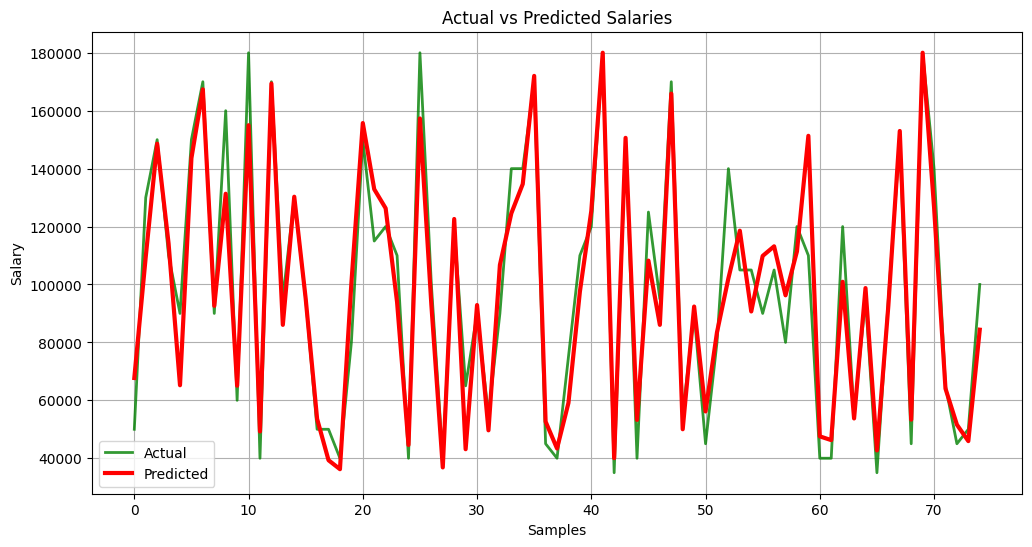

In [594]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, color='Green', label='Actual', linewidth=2, alpha = 0.8)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted', linewidth=3)

plt.xlabel('Samples')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()